# Sentiment Analysis on Amazon Reviews


In this notebook we will be doing some sentiment analysis in python using two different techniques:

VADER (Valence Aware Dictionary for Sentiment Reasoning) - Bag of words approach
Roberta Pretrained Model from the Huggingface Pipeline

## Reading Data

In [2]:
!nvidia-smi

Thu Jun 29 13:53:21 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
 nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\FM-PC-
[nltk_data]     LT-277\AppData\Roaming\nltk_data...


True

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
plt.style.use('ggplot')

In [8]:
# Read in data
df = pd.read_csv('/content/Reviews.csv')

In [9]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1.0,1.0,5.0,1.303862e+09,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0.0,0.0,1.0,1.346976e+09,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1.0,1.0,4.0,1.219018e+09,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3.0,3.0,2.0,1.307923e+09,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0.0,0.0,5.0,1.350778e+09,Great taffy,Great taffy at a great price. There was a wid...


In [10]:
df = df.head(100)
print(df.shape)

(100, 10)


In [11]:
df['Text'].values[0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [12]:
print(df.shape)


(100, 10)


## EDA

In [13]:
df['Score'].value_counts()

5.0    67
4.0    12
3.0     9
1.0     8
2.0     4
Name: Score, dtype: int64

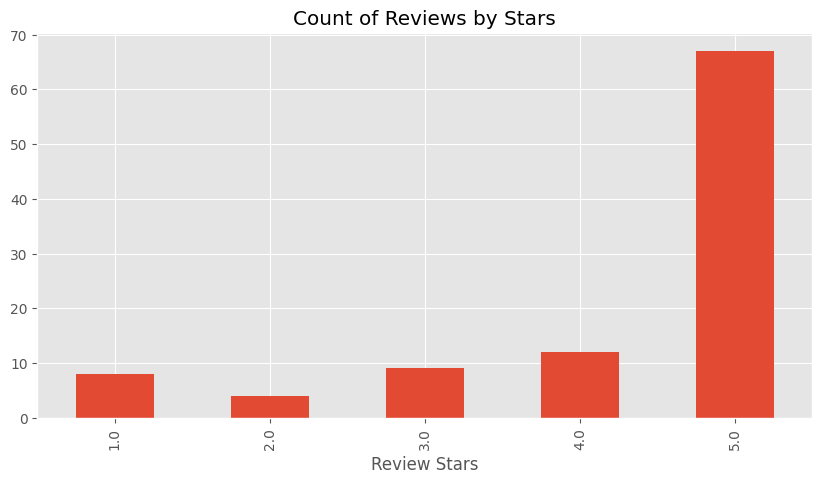

In [14]:
ax = df['Score'].value_counts().sort_index() .plot(kind='bar', title='Count of Reviews by Stars', figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

## Basic NLTK

In [15]:
text1 = df['Text'][9]
print(text1)

This is a very healthy dog food. Good for their digestion. Also good for small puppies. My dog eats her required amount at every feeding.


In [23]:
nltk.word_tokenize(text1)

['This',
 'is',
 'a',
 'very',
 'healthy',
 'dog',
 'food',
 '.',
 'Good',
 'for',
 'their',
 'digestion',
 '.',
 'Also',
 'good',
 'for',
 'small',
 'puppies',
 '.',
 'My',
 'dog',
 'eats',
 'her',
 'required',
 'amount',
 'at',
 'every',
 'feeding',
 '.']

In [24]:
tokens = nltk.word_tokenize(text1)
tokens[:10]

['This', 'is', 'a', 'very', 'healthy', 'dog', 'food', '.', 'Good', 'for']

In [28]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('This', 'DT'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('very', 'RB'),
 ('healthy', 'JJ'),
 ('dog', 'NN'),
 ('food', 'NN'),
 ('.', '.'),
 ('Good', 'NNP'),
 ('for', 'IN')]

In [33]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  This/DT
  is/VBZ
  a/DT
  very/RB
  healthy/JJ
  dog/NN
  food/NN
  ./.
  (PERSON Good/NNP)
  for/IN
  their/PRP$
  digestion/NN
  ./.
  Also/RB
  good/JJ
  for/IN
  small/JJ
  puppies/NNS
  ./.
  My/PRP$
  dog/NN
  eats/VBZ
  her/PRP$
  required/JJ
  amount/NN
  at/IN
  every/DT
  feeding/NN
  ./.)


## VADER(Valence Aware Dictionary for Sentiment Reasoning) Seniment Scoring


We will use NLTK's SentimentIntensityAnalyzer to get the neg/neu/pos scores of the text.
This uses a the 'bag of words' approach

In [37]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [38]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [39]:
sia.polarity_scores('This is bad.')

{'neg': 0.636, 'neu': 0.364, 'pos': 0.0, 'compound': -0.5423}

In [40]:
sia.polarity_scores(text1)


{'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.8313}

### Run the polarity score on the entire dataset

In [41]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/100 [00:00<?, ?it/s]

In [42]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')

In [43]:
# Now we have sentiment score and metadata
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1.0,1.0,5.0,1.303862e+09,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0.0,0.0,1.0,1.346976e+09,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1.0,1.0,4.0,1.219018e+09,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3.0,3.0,2.0,1.307923e+09,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0.0,0.0,5.0,1.350778e+09,Great taffy,Great taffy at a great price. There was a wid...


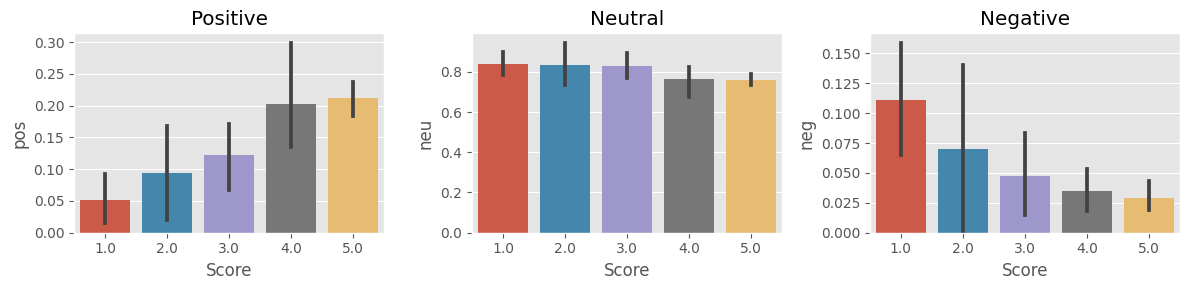

In [44]:
# Plot VADER Result
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

## Roberta Pretrained Model

Using a pretrained model of a large corpus of data.

Transformer model accounts for the words but also the context related to other words.

In [47]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [48]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [49]:
# Roberta Model
encoded_text = tokenizer(text1, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.0031034567, 'roberta_neu': 0.05591218, 'roberta_pos': 0.9409843}


In [50]:
def polarity_scores_roberta(text1):
    encoded_text = tokenizer(text1, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [51]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Text']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/100 [00:00<?, ?it/s]

Broke for id 83


In [52]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')

In [53]:
results_df.columns


Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

## Comparing the result

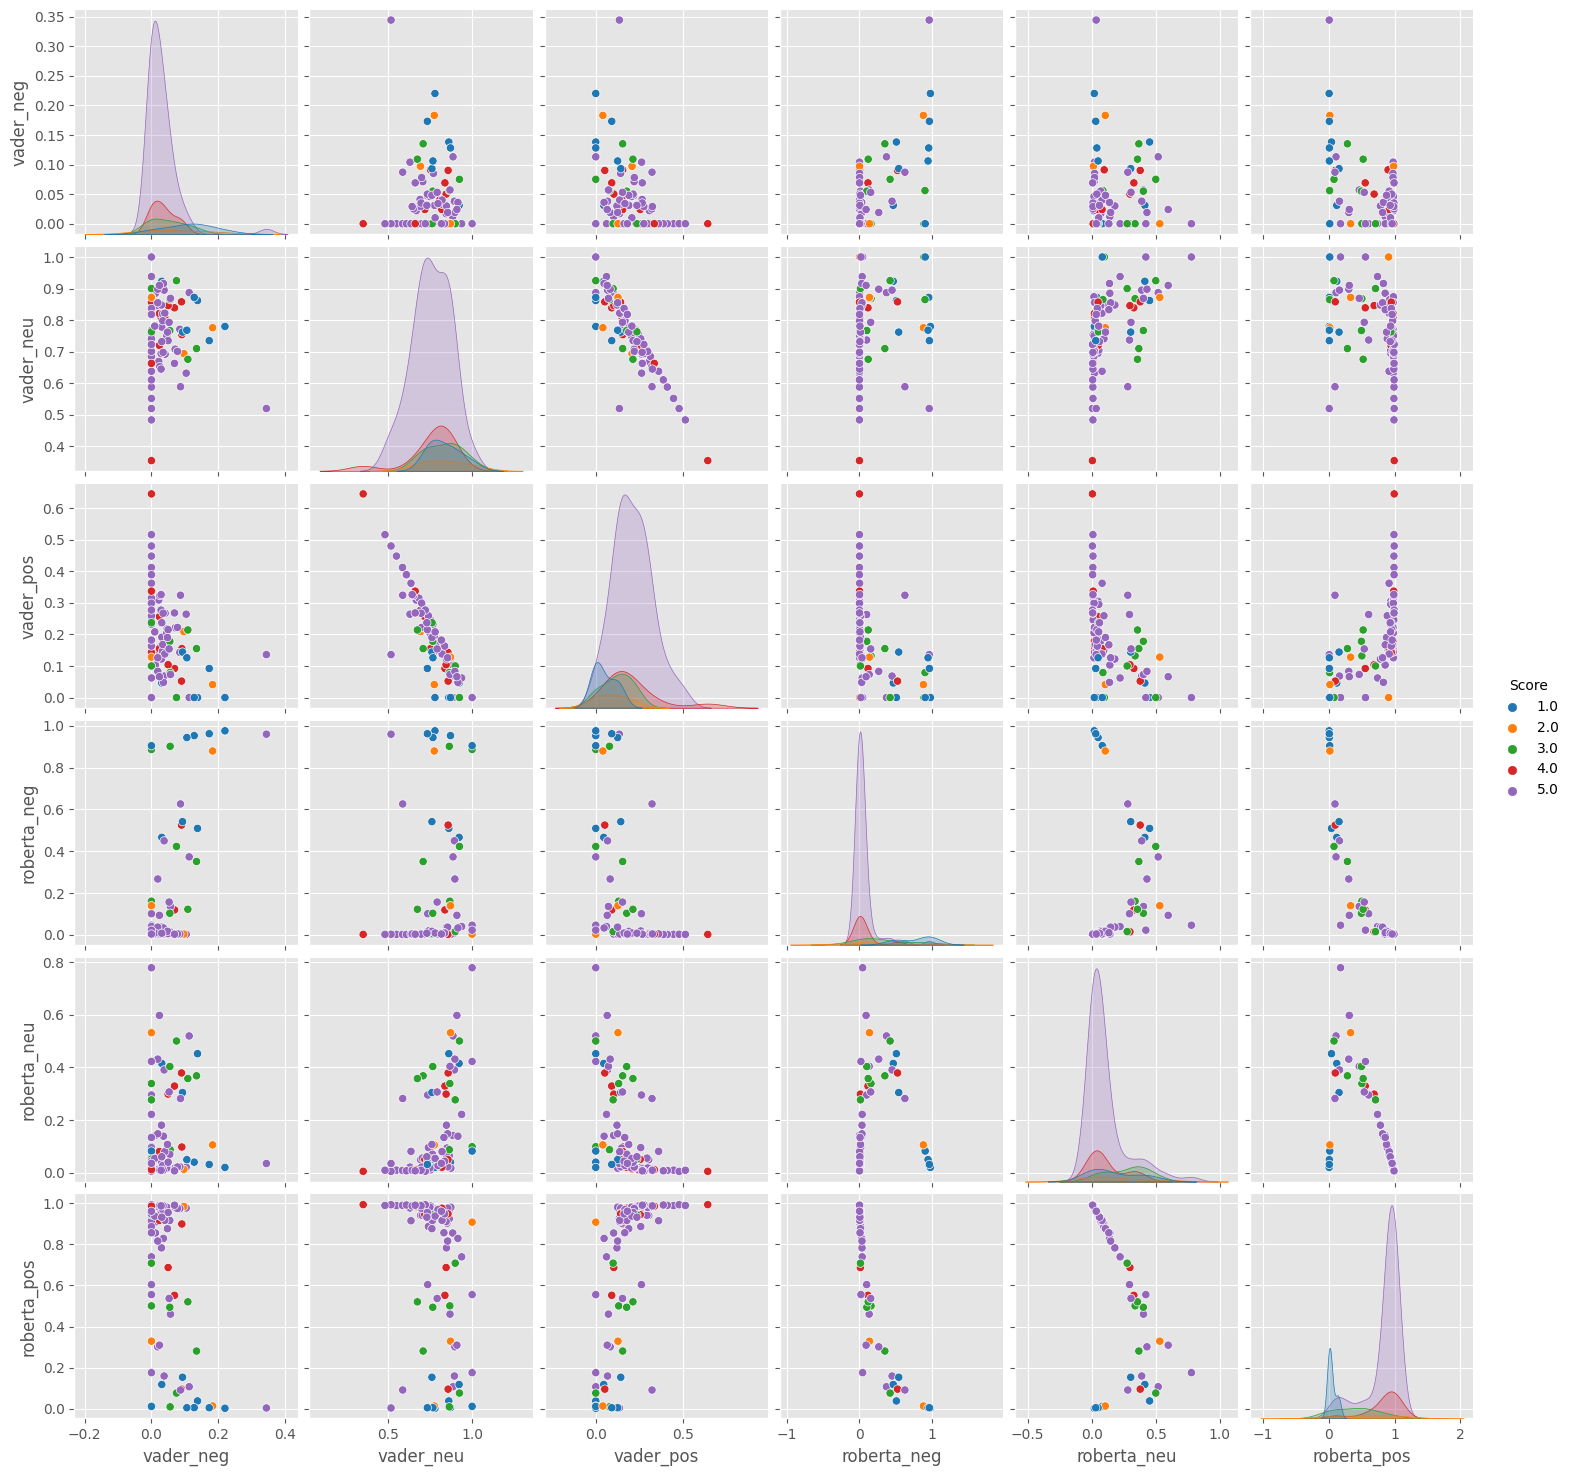

In [54]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Score',
            palette='tab10')
plt.show()

## Pretrained BERT Moddel

In [55]:
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

In [56]:
tokens = tokenizer.encode('This is not good', return_tensors='pt')
result = model(tokens)
result


SequenceClassifierOutput(loss=None, logits=tensor([[ 3.5033,  2.3094,  0.6291, -2.2044, -3.3696]],
       grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [57]:
result.logits

tensor([[ 3.5033,  2.3094,  0.6291, -2.2044, -3.3696]],
       grad_fn=<AddmmBackward0>)

In [58]:
import torch
int(torch.argmax(result.logits))+1


1

In [62]:
def sentiment_score(Text):
    tokens = tokenizer.encode(Text, return_tensors='pt')
    result = model(tokens)
    return int(torch.argmax(result.logits))+1

sentiment_score(df['Text'].iloc[1])
df['sentiment_bert'] = df['Text'].apply(lambda x: sentiment_score(x[:512]))

In [63]:
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,sentiment_bert
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1.0,1.0,5.0,1.303862e+09,Good Quality Dog Food,I have bought several of the Vitality canned d...,5
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0.0,0.0,1.0,1.346976e+09,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,1
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1.0,1.0,4.0,1.219018e+09,"""Delight"" says it all",This is a confection that has been around a fe...,5
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3.0,3.0,2.0,1.307923e+09,Cough Medicine,If you are looking for the secret ingredient i...,5
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0.0,0.0,5.0,1.350778e+09,Great taffy,Great taffy at a great price. There was a wid...,5
...,...,...,...,...,...,...,...,...,...,...,...
95,96,B0019CW0HE,A1BFNM27629VAV,E. Triebe,0.0,0.0,5.0,1.320106e+09,Good healthy dog food,I've been very pleased with the Natural Balanc...,5
96,97,B0019CW0HE,A18AAABCIJKC5Q,Rhiever,0.0,0.0,5.0,1.303776e+09,Great dog food,My 1-1/2 year old basenji/jack russell mix lov...,4
97,98,B0019CW0HE,A3UII2114114PI,"FuNky Faja ""SiLkk""",0.0,0.0,5.0,1.297296e+09,"Great allergy sensitive dog food, dogs love it",Our pup has experienced allergies in forms of ...,5
98,99,B0019CW0HE,ABZ9F0D94YK45,Amazon-tron 3000,0.0,0.0,5.0,1.295309e+09,Perfect for our English Bulldog with Allergies,My English Bulldog had skin allergies the summ...,5


In [64]:
df['Text'].iloc[7]

'This taffy is so good.  It is very soft and chewy.  The flavors are amazing.  I would definitely recommend you buying it.  Very satisfying!!'

In [65]:
sentiment_score(df['Text'].iloc[7])

5

## Using Transformers Pipeline

In [66]:
from transformers import pipeline
sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


In [67]:
sent_pipeline('I love sentiment analysis!')

[{'label': 'POSITIVE', 'score': 0.9997853636741638}]